# **Prediction using Decision Tree Algorithm**

Name: Aniket Chatterjee

Dataset: Iris dataset

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#loading the dataset and forming the dataframe 
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
y = pd.DataFrame(y,columns=["Target"])

In [3]:
#concatenating the data with the target variable
df = pd.concat([data,y],axis=1)

In [4]:
#displaying first five rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#viewing the dimesnions 
df.shape

(150, 5)

In [7]:
#getting further information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
#finding correlation 
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


**Plotting the pair plot**

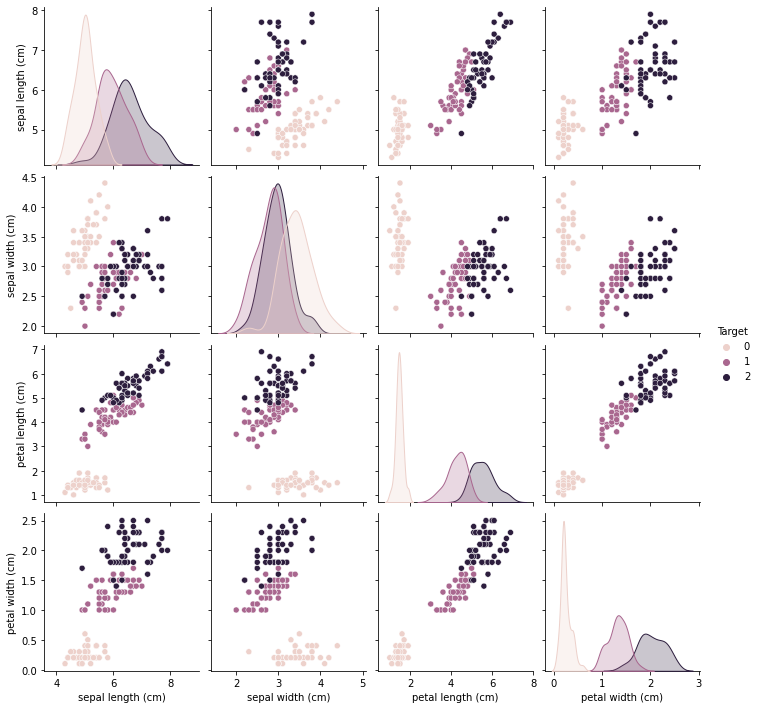

In [10]:
sns.pairplot(df, hue='Target')


<Figure size 720x576 with 0 Axes>

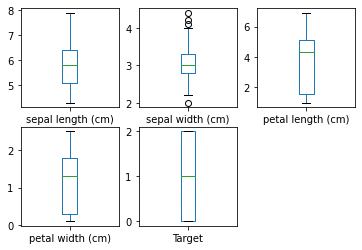

<Figure size 432x288 with 0 Axes>

In [11]:
#plotting box plot to check for outliers 
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()


**Splitting data into Attributes(x) and Labels(y)**

In [13]:
x = df.drop("Target",axis=1)
y = df.Target

**Splitting the data into training and testing sets**

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=123,test_size=0.2)

In [15]:
#initializing decision tree model and fitting 
dt=DecisionTreeClassifier(random_state=123)
dt_fit = dt.fit(xtrain,ytrain)

#prediction of decision tree
dt_predict = dt_fit.predict(xtest)

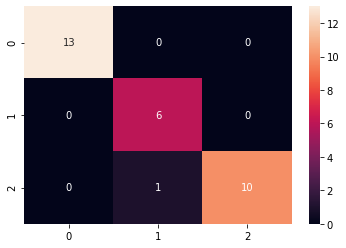

In [16]:
#evaluating the model 
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)


In [17]:
#classification report
classificationreport = classification_report(ytest,dt_predict)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [18]:
#accuracy 
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy is:",accuracy)

Accuracy is: 0.9666666666666667


**Visualising the graph**

In [24]:
export_graphviz(dt_fit,out_file='tree.dot',feature_names=iris.feature_names, filled=True, rounded=True,special_characters=True)

In [27]:
 # to convert the tree in a png image
!dot -Tpng tree.dot > tree.png


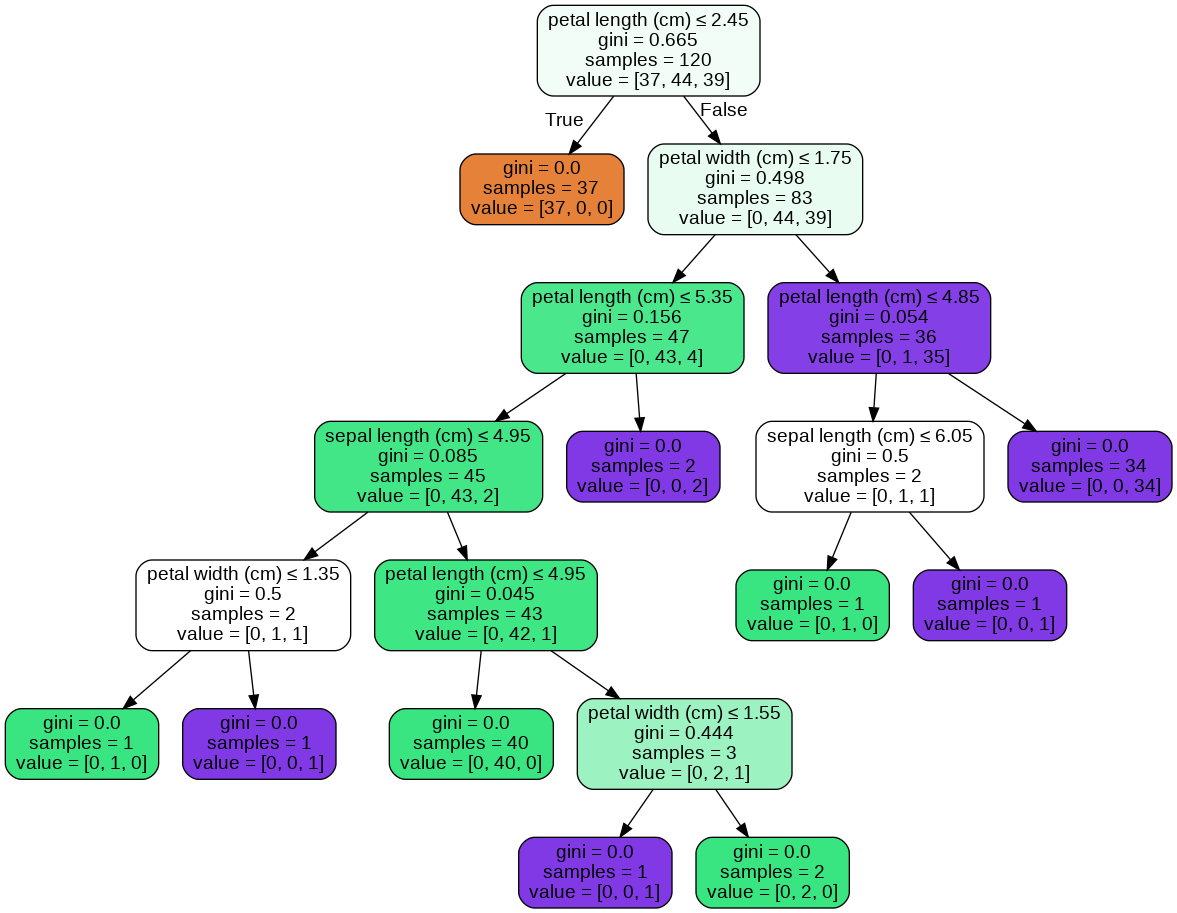

In [29]:
Image(filename='tree.png')

# **Thank You!**